In [37]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
url = 'https://en.wikipedia.org/wiki/2022_FIFA_World_Cup_squads'
df = pd.read_html(url)
df

[    No. Pos.                    Player  Date of birth (age)  Caps  Goals  \
 0     1   GK           Hernán Galíndez                  NaN    12      0   
 1     2   DF              Félix Torres                  NaN    17      2   
 2     3   DF            Piero Hincapié                  NaN    21      1   
 3     4   DF           Robert Arboleda                  NaN    33      2   
 4     5   MF            José Cifuentes                  NaN    11      0   
 5     6   DF             William Pacho                  NaN     0      0   
 6     7   DF          Pervis Estupiñán                  NaN    28      3   
 7     8   MF             Carlos Gruezo                  NaN    46      1   
 8     9   MF           Ayrton Preciado                  NaN    27      3   
 9    10   MF            Romario Ibarra                  NaN    25      3   
 10   11   FW           Michael Estrada                  NaN    36      8   
 11   12   GK            Moisés Ramírez                  NaN     2      0   

In [3]:
teams_by_groups = {'Group A': ['Ecuador', 'Netherlands', 'Qatar', 'Senegal']}

In [4]:
ecuador = df[0]

In [5]:
fifa_ratings = pd.read_csv('Fifa 23 Players Data.csv')
fifa_ratings

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


In [6]:
col = ['Full Name','Overall','Nationality']

In [7]:
fifa_ratings = fifa_ratings[col]
fifa_ratings

,Full Name,Overall,Nationality
0,Lionel Messi,91,Argentina
1,Karim Benzema,91,France
2,Robert Lewandowski,91,Poland
3,Kevin De Bruyne,91,Belgium
4,Kylian Mbappé,91,France
...,...,...,...
18534,Darren Collins,47,Republic of Ireland
18535,Dejiang Yang,47,China PR
18536,Liam Mullan,47,Northern Ireland
18537,Daithí McCallion,47,Republic of Ireland


In [8]:
ecuador = ecuador.rename({'Player': 'Full Name'}, axis=1)

In [9]:
pd.concat([fifa_ratings, ecuador], join='inner')

,Full Name
0,Lionel Messi
1,Karim Benzema
2,Robert Lewandowski
3,Kevin De Bruyne
4,Kylian Mbappé
...,...
21,Alexander Domínguez
22,Moisés Caicedo
23,Djorkaeff Reasco
24,Jackson Porozo


In [10]:
ecuador.join(fifa_ratings.set_index('Full Name'), on = 'Full Name').sort_values(by='Overall', ascending=False)

,No.,Pos.,Full Name,Date of birth (age),Caps,Goals,Club,Overall,Nationality
6,7,DF,Pervis Estupiñán,NaN,28,3,Brighton & Hove Albion,79.0,Ecuador
2,3,DF,Piero Hincapié,NaN,21,1,Bayer Leverkusen,78.0,Ecuador
18,19,MF,Gonzalo Plata,NaN,30,5,Valladolid,77.0,Ecuador
4,5,MF,José Cifuentes,NaN,11,0,Los Angeles FC,73.0,Ecuador
7,8,MF,Carlos Gruezo,NaN,46,1,FC Augsburg,72.0,Ecuador
20,21,MF,Alan Franco,NaN,25,1,Talleres,72.0,Argentina
17,18,DF,Diego Palacios,NaN,12,0,Los Angeles FC,71.0,Ecuador
11,12,GK,Moisés Ramírez,NaN,2,0,Independiente del Valle,70.0,Ecuador
22,23,MF,Moisés Caicedo,NaN,25,2,Brighton & Hove Albion,70.0,Ecuador
13,14,DF,Xavier Arreaga,NaN,18,1,Seattle Sounders FC,69.0,Ecuador


In [11]:
fifa_ratings[fifa_ratings['Nationality']=='Ecuador'].head(25)

,Full Name,Overall,Nationality
515,Pervis Estupiñán,79,Ecuador
689,Piero Hincapié,78,Ecuador
990,Gonzalo Plata,77,Ecuador
1730,Felipe Caicedo,75,Ecuador
1758,Enner Valencia,75,Ecuador
2242,Juan Cazares,74,Ecuador
2786,José Cifuentes,73,Ecuador
2979,Pedro Ortíz,72,Ecuador
3009,Carlos Gruezo,72,Ecuador
3306,Alexander Alvarado,72,Ecuador


In [12]:
ecuador.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No.                  26 non-null     int64  
 1   Pos.                 26 non-null     object 
 2   Full Name            26 non-null     object 
 3   Date of birth (age)  0 non-null      float64
 4   Caps                 26 non-null     int64  
 5   Goals                26 non-null     int64  
 6   Club                 26 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.5+ KB


In [13]:
fifa_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Full Name    18539 non-null  object
 1   Overall      18539 non-null  int64 
 2   Nationality  18539 non-null  object
dtypes: int64(1), object(2)
memory usage: 434.6+ KB


In [14]:
ecuador['Full Name']

0              Hernán Galíndez
1                 Félix Torres
2               Piero Hincapié
3              Robert Arboleda
4               José Cifuentes
5                William Pacho
6             Pervis Estupiñán
7                Carlos Gruezo
8              Ayrton Preciado
9               Romario Ibarra
10             Michael Estrada
11              Moisés Ramírez
12    Enner Valencia (captain)
13              Xavier Arreaga
14                  Ángel Mena
15            Jeremy Sarmiento
16             Ángelo Preciado
17              Diego Palacios
18               Gonzalo Plata
19                Sebas Méndez
20                 Alan Franco
21         Alexander Domínguez
22              Moisés Caicedo
23            Djorkaeff Reasco
24              Jackson Porozo
25             Kevin Rodríguez
Name: Full Name, dtype: object

In [15]:
replace=re.compile(r'\(captain\)')

In [16]:
ecuador['Full Name'] = ecuador['Full Name'].str.replace(replace, '').str.strip()

In [17]:
ecuador.join(fifa_ratings.set_index('Full Name'), on = 'Full Name').sort_values(by='Overall', ascending=False)

,No.,Pos.,Full Name,Date of birth (age),Caps,Goals,Club,Overall,Nationality
6,7,DF,Pervis Estupiñán,NaN,28,3,Brighton & Hove Albion,79.0,Ecuador
2,3,DF,Piero Hincapié,NaN,21,1,Bayer Leverkusen,78.0,Ecuador
18,19,MF,Gonzalo Plata,NaN,30,5,Valladolid,77.0,Ecuador
12,13,FW,Enner Valencia,NaN,74,35,Fenerbahçe,75.0,Ecuador
4,5,MF,José Cifuentes,NaN,11,0,Los Angeles FC,73.0,Ecuador
20,21,MF,Alan Franco,NaN,25,1,Talleres,72.0,Argentina
7,8,MF,Carlos Gruezo,NaN,46,1,FC Augsburg,72.0,Ecuador
17,18,DF,Diego Palacios,NaN,12,0,Los Angeles FC,71.0,Ecuador
22,23,MF,Moisés Caicedo,NaN,25,2,Brighton & Hove Albion,70.0,Ecuador
11,12,GK,Moisés Ramírez,NaN,2,0,Independiente del Valle,70.0,Ecuador


In [18]:
countries = ['Ecuador',
 'Netherlands',
 'Qatar',
 'Senegal',
 'England',
 'Iran',
 'Wales',
 'Argentina',
 'Mexico',
 'Poland',
 'Australia',
 'Denmark',
 'France',
 'Tunisia',
 'Germany',
 'Japan',
 'Spain',
 'Belgium',
 'Canada',
 'Croatia',
 'Morocco',
 'Brazil',
 'Cameroon',
 'Serbia',
 'Switzerland',
 'Ghana',
 'Portugal',
 'Uruguay']

In [19]:
len(countries)

28

In [22]:
def make_country_df(country):
    country = country.rename({'Player': 'Full Name'}, axis=1)
    replace = re.compile(r'\(captain\)')
    country['Full Name'] = country['Full Name'].str.replace(replace, '').str.strip()
    country = country.join(fifa_ratings.set_index('Full Name'), on = 'Full Name').sort_values(by='Overall', ascending=False)
    return country

In [23]:
wc = pd.DataFrame()
for i in range(32):
    wc = pd.concat([wc,df[i]])
wc.tail(40)

,No.,Pos.,Player,Date of birth (age),Caps,Goals,Club
12,13,MF,Son Jun-ho,NaN,15,0,Shandong Taishan
13,14,DF,Hong Chul,NaN,46,1,Daegu FC
14,15,DF,Kim Moon-hwan,NaN,22,0,Jeonbuk Hyundai Motors
15,16,FW,Hwang Ui-jo,NaN,49,16,Olympiacos
16,17,MF,Na Sang-ho,NaN,24,2,FC Seoul
17,18,MF,Lee Kang-in,NaN,6,0,Mallorca
18,19,DF,Kim Young-gwon,NaN,96,6,Ulsan Hyundai
19,20,DF,Kwon Kyung-won,NaN,28,2,Gamba Osaka
20,21,GK,Jo Hyeon-woo,NaN,22,0,Ulsan Hyundai
21,22,MF,Kwon Chang-hoon,NaN,42,12,Gimcheon Sangmu


In [24]:
wc_df = make_country_df(wc)

In [25]:
wc_df.tail(20)

,No.,Pos.,Full Name,Date of birth (age),Caps,Goals,Club,Overall,Nationality
15,16,FW,Hwang Ui-jo,NaN,49,16,Olympiacos,NaN,NaN
16,17,MF,Na Sang-ho,NaN,24,2,FC Seoul,NaN,NaN
17,18,MF,Lee Kang-in,NaN,6,0,Mallorca,NaN,NaN
18,19,DF,Kim Young-gwon,NaN,96,6,Ulsan Hyundai,NaN,NaN
19,20,DF,Kwon Kyung-won,NaN,28,2,Gamba Osaka,NaN,NaN
20,21,GK,Jo Hyeon-woo,NaN,22,0,Ulsan Hyundai,NaN,NaN
21,22,MF,Kwon Chang-hoon,NaN,42,12,Gimcheon Sangmu,NaN,NaN
22,23,DF,Kim Tae-hwan,NaN,19,0,Ulsan Hyundai,NaN,NaN
23,24,DF,Cho Yu-min,NaN,4,0,Daejeon Hana Citizen,NaN,NaN
24,25,MF,Jeong Woo-yeong,NaN,9,2,SC Freiburg,NaN,NaN


In [26]:
wc_df[wc_df['Nationality']=='Belgium']

,No.,Pos.,Full Name,Date of birth (age),Caps,Goals,Club,Overall,Nationality
6,7,MF,Kevin De Bruyne,NaN,94,25,Manchester City,91.0,Belgium
0,1,GK,Thibaut Courtois,NaN,97,0,Real Madrid,90.0,Belgium
8,9,FW,Romelu Lukaku,NaN,102,68,Internazionale,86.0,Belgium
10,11,FW,Yannick Carrasco,NaN,60,8,Atlético Madrid,85.0,Belgium
13,14,FW,Dries Mertens,NaN,107,21,Galatasaray,84.0,Belgium
7,8,MF,Youri Tielemans,NaN,55,5,Leicester City,84.0,Belgium
9,10,FW,Eden Hazard,NaN,123,33,Real Madrid,84.0,Belgium
12,13,GK,Koen Casteels,NaN,4,0,VfL Wolfsburg,84.0,Belgium
1,2,DF,Toby Alderweireld,NaN,124,5,Antwerp,82.0,Belgium
4,5,DF,Jan Vertonghen,NaN,142,9,Anderlecht,81.0,Belgium


In [27]:
wc_df.groupby('Nationality')['Overall'].mean().sort_values(ascending=False)

Nationality
Spain            86.000000
Portugal         82.000000
Germany          81.777778
Argentina        80.720000
England          80.620690
France           80.416667
Netherlands      79.920000
Belgium          78.516129
Croatia          77.777778
Serbia           77.375000
Uruguay          77.222222
Denmark          77.111111
Mexico           76.739130
Morocco          76.105263
Switzerland      76.040000
Senegal          75.136364
Poland           74.884615
Japan            73.947368
United States    73.800000
Ghana            72.760000
Iran             72.300000
Cameroon         72.071429
Costa Rica       71.750000
Wales            71.640000
Canada           71.454545
Ecuador          71.000000
Tunisia          70.666667
Australia        69.458333
Qatar            68.266667
Panama           68.000000
Saudi Arabia     67.750000
Italy            67.000000
Name: Overall, dtype: float64

In [28]:
fifa_ratings[fifa_ratings['Nationality']=='Korea Republic']

,Full Name,Overall,Nationality
12,Heung Min Son,89,Korea Republic
517,Min Jae Kim,79,Korea Republic
1065,Hee Chan Hwang,77,Korea Republic
1181,Jae Sung Lee,76,Korea Republic
2165,Jeong Ho Hong,74,Korea Republic
...,...,...,...
18312,Jae Sung Kim,51,Korea Republic
18342,Hyeon Bin Seol,50,Korea Republic
18343,Suk Ju Yoon,50,Korea Republic
18368,Hak Yun Lee,50,Korea Republic


In [29]:
wc_df[wc_df['Full Name']=='Heung Min Son']

,No.,Pos.,Full Name,Date of birth (age),Caps,Goals,Club,Overall,Nationality


In [40]:
goals_by_num = wc_df.groupby('No.')['Goals'].sum().sort_values(ascending=False)
goals_by_num

No.
10    728
9     622
7     401
11    286
13    169
19    161
20    138
21    137
18    118
5     107
22    106
8     103
16    100
23     94
17     92
4      86
15     84
6      81
14     73
3      71
12     60
2      45
25     29
24     26
26      4
1       0
Name: Goals, dtype: int64

<AxesSubplot:xlabel='No.'>

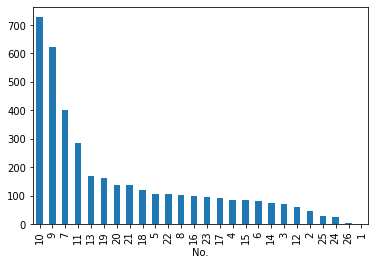

In [44]:
goals_by_num.plot(kind='bar')

In [51]:
pos_by_num = wc_df.groupby('Pos.')['No.'].value_counts()
pos_by_num

Pos.  No.
DF    3      33
      2      32
      4      30
      5      21
      6      13
             ..
MF    9       4
      4       3
      2       1
      3       1
      12      1
Name: No., Length: 81, dtype: int64

<AxesSubplot:xlabel='No.'>

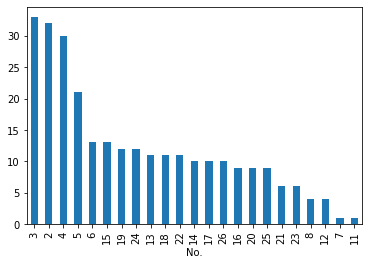

In [60]:
pos_by_num['DF'].plot(kind='bar')

<AxesSubplot:xlabel='No.'>

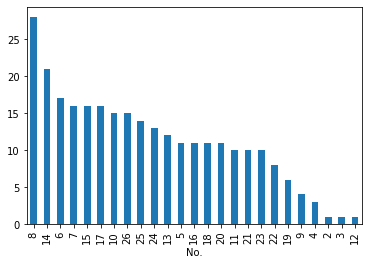

In [59]:
pos_by_num['MF'].plot(kind='bar')

<AxesSubplot:xlabel='No.'>

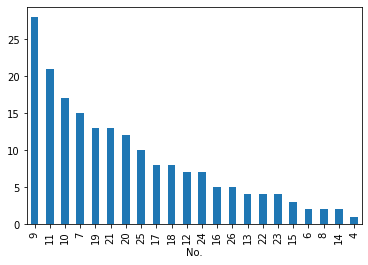

In [61]:
pos_by_num['FW'].plot(kind='bar')

In [55]:
goals_by_pos = wc_df.groupby('Pos.')['Goals'].sum().sort_values(ascending=False)
goals_by_pos

Pos.
FW    2369
MF    1102
DF     450
GK       0
Name: Goals, dtype: int64

<AxesSubplot:xlabel='Pos.'>

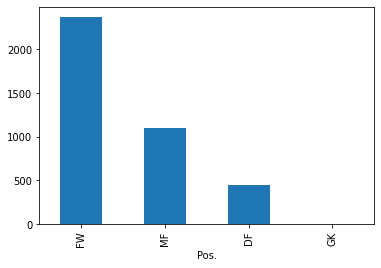

In [56]:
goals_by_pos.plot(kind='bar')